Name: Josemaria Macedo Carrillo\
Ttile: Land Matrix Data Exploration\
Created: 06/22/23\
Last modified: 07/26/23\
DSI

The purpose of this notebook is to map land deals locations in Ukraine related to
specific companies. The main data source is the Land Matrix initiative.

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import geopandas as gpd
from utils.map import filter_country, plot_map, top_subsidiaries

Import Land Matrix data.

In [2]:
# This is the main data source but I don't know if we have to focus on the "Top parent companies" or the "Operating company: Investor ID"
deals = pd.read_csv("../data/land_matrix/deals.csv", delimiter=";")

# Land regional location data. The data appears to be at the municipal level
locations = pd.read_csv("../data/land_matrix/locations.csv", delimiter=";")

# Load shape file with map at the "hromada" level from HDX: https://data.humdata.org/dataset/cod-ab-ukr?
ukr_regions = gpd.read_file('../data/regional_maps/ukr_admbnda_adm3_sspe_20230201.shp')

/var/folders/j4/m2rbwhqs6yq26cq7rc0g4cm80000gn/T/ipykernel_8655/1502898702.py:2: DtypeWarning: Columns (139) have mixed types. Specify dtype option on import or set low_memory=False.
  deals = pd.read_csv("../data/land_matrix/deals.csv", delimiter=";")


Map land holdings for all companies in Ukraine.

/Users/jmacedoc/miniconda3/envs/ukraine-exports/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


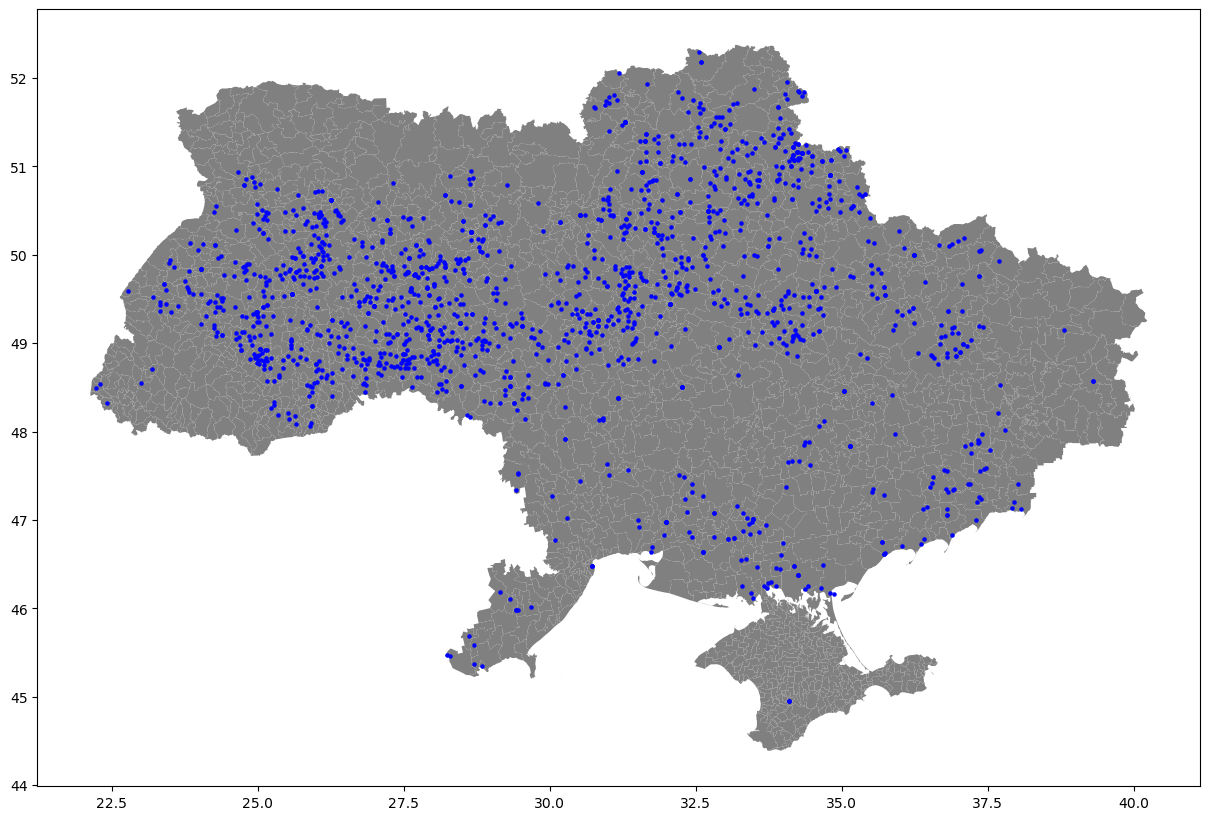

In [3]:
final = filter_country(locations, deals)
plot_map(final, ukr_regions)

Get subsidaries for top 10 firms controlling agricultural land in Ukraine.

In [4]:
parent_lst= ["Kernel Holding S.A.", "UkrLandFarming", "MHP S.E.", "TNA Corporate Solutions LLC", "NHC Capital", "Ivanchyk V.P.", "Industrial Milk Company", "Public Investment Fund", "Agroton Public Limited", "Nibulon", "System Capital Management"]
d_subsidiaries = {}

for parent in parent_lst:
    d_subsidiaries[parent] = top_subsidiaries(deals, parent, 10)

d_subsidiaries


{'Kernel Holding S.A.': array(['Unknown (Kernel Holding S.A., in Ukraine, 38098)',
        'Druzhba Nova LLC', 'Prydniprovskyi Kray ALLC', 'Enselco Agro LLC',
        'Unknown (Kernel Holding S.A., in Ukraine, 35574)',
        'Podillya-Agroservice LLC', 'Kalyna LLC', 'Vyshneve-Agro ALLC',
        'Hovtva ALLC', 'Agropolis LLC'], dtype=object),
 'UkrLandFarming': array(['Valinor Public Ltd. in Ukraine', 'Dakor Agroholding',
        'UkrLandFarming PLC', 'Yugtranzitservis-agroproduct LLC',
        'Agrocompany Prykarpattya LLC', 'PSP im. Т. G. Shevchenko',
        'LLC im.KL.Petrovskoho'], dtype=object),
 'MHP S.E.': array(['Zernoproduct MHP LLC', 'Zahid-Agro MHP LLC',
        'Urozhaina Kraina LLC', 'IPE Ridnyi Krai LLC', 'Agro-S LLC',
        'Affiliate “Perspective” of PrJSC “Zernoproduct MHP”',
        'STOV Agrokriazh', 'PJSC "Agrofort"', 'AF Zapovit Shevchenko',
        'Zvenyhorodska branch of SPF "Urozhay"'], dtype=object),
 'TNA Corporate Solutions LLC': array(['Рrivate Joint S